# Lecture 5: Regression Analysis

## The simple linear regression model

Let's consider the following question: what is the relationship between food expenditure and income? As a data scientist or an empirical researcher, our interest lies on understanding the empirical relationship between the two factors. For example, we may ask, if weekly income goes up by 100 dollars, how much would average weekly food expenditures rise? The answer could be useful for the government, for example, to figure out whether providing a weekly 100 dollars subsidy to household could lead to significant change in household nutrition intake. Others, such as a potential mortgage lender, might be interested in knowing the relationship because they need to figure out, for example, if a household has an income of 2,000 dollars per week, how much of it would need to be spent for  food expenditure and how much would be left for mortgage weekly payment.

### From economic theory of consumption ...

Usually, to guide our empirical investigation, we will consult various theories which have some empirical representation. In economics, the consumption theory suggests that the relationship between household food expenditure can be expressed as a statistical relationship: $FoodExpenditure = f(income) + randomerror$. <br> 

### ... to a simple linear regression model
Based on this theory, we can then propose an estimable empirical model such as the one below where we make an assumption that the function $f(.)$ which relates income to food expenditure is a linear function with two unknown parameters ($\beta_1$ and $\beta_2$): <br>
<br>
$y_i = \beta_1 + \beta_2 x_i + \epsilon_i$ <br>
<br>
where, for any given household $i$, $y_i$ is a measure of the household's food expenditure, $x_i$ is a measure of the household's weekly income, and $epsilon_i$ is a measure of all other unobserved factors which may affect the household's food expenditure. <br>

The above model specification is usually known as a population simple linear regression model between one dependent variable ($y_i$) and one independent variable ($x_i$). In this case, the dependent variable is also called the _regressand_; while the independent variable is called the _regressor_. The two parameters in Greek characters ($\beta_1$ and $\beta_2$) are unknown population parameters which characterise the empirical relationship between $y_i$ and $x_i$. It is the objective or regression analysis to come up with a statistical estimate of these parameters using random sample data.

In the "model" specified above, the variables $y_i$, $x_i$, and $epsilon_i$ are random variables as opposed to deterministic variables. Thus, if we want to be able to characterise the relationship between the variables, we will need to know how to characterise the data generating process of the random variables (i.e. how the value of the random variables and their relationships are realised). 

## Random variables and a fair coin toss data generating process (DGP)

We consider an event as random if we do not know the event until we observed it. Thus, we consider a variable $x$ as a random variable if its value is unknown until we observed it. In this case, a random variable $x$ is a mathematical notation to represent the outcome of a random event. For example:
- Toss a coin: will you see head or tail?
- The event of tossing a coin is a random event
- The outcome of tossing a coin is a random variable
- The value of the random variable (head or tail) is unknown until the outcome is observed

In other words, when we say the variable $Y$, $X$, or $\epsilon$ is a random variable it is because we do NOT know about its value until we observe it. However, if we know their probability distribution (that is, for example, the probability of observing any given value $Y=y$), then we may be able to say more than just saying we do not know until we observed the value. <br>

More formally, if $𝑋$ is a random variable then its value is determined by a random process (that is, the value is initially is unknown before the random outcome is realised). Now, denote $𝑃[𝑋=𝑥]$ is the probability that a random variable $𝑋$ takes a value of $𝑥$ and consider the tossing a coin random process. 
- Tossing a coin can have two possible outcomes: head or tail. 
- Let the event 𝑋 be either ‘Head’ or ‘Tail’ observed. Then, 𝑃(𝑋=‘𝐻𝑒𝑎𝑑’) = 0.5 (if the coin is ‘fair’)

Where does 0.5 come from? If we toss a coin many times, we expect to observe ‘Head’ half of the time. That is, the data generating process (DGP) of a fair coin toss will produce 50% 'Head' and 50% 'Tail'. In the Python codes example below, we define `faircoin(ntoss)` as a function that simulate a fair coin toss. The function takes `ntoss`, the number of coin tosses, and return a list object `tosses` containing the value of either 'HEAD' or 'TAIL'. The basic idea of the `faircoin` functions is:

- Toss a coin and observe two possible outcomes/events: 'HEAD' or 'TAIL'
- In theory, if we toss the same coin many times, then if the coin is a fair coin we will obtain the probability $Prob['HEAD'] = Prob['TAIL'] = 0.5$ (i.e., 50%). Otherwise, we conclude the coin is not a fair coin.
- The `faircoin` function simulates a fair coin toss by making repeated random draw of $x$ from a Uniform[0,1] distribution. In the simulation, we call a 'HEAD' if $x>0.5$ and 'TAIL', otherwise. The function then store and return the toss result in a list object named `tosses`

Do we observe each outcome 50% of the time from the list object `tosses`? 

In [1]:
#%% Tossing a coin
# (modified from askpython.com)
import random as rd

#import random module to use for the random toss
def faircoin(ntoss):
    """
    Parameters:
    ntoss : int (number of tosses)

    Description:
    Toss a fair coin which has two possible outcomes ('HEAD' or 'TAIL') with
    the probability of the outcome is 'HEAD' is = 0.50

    Returns:
    A list containing the outcomes of the tosses
    """
    #This is the list of toss outcomes
    tosses = []

    #toss the coin ntoss times
    for i in range(ntoss):
        
        #draw from a uniform probability distribution on [0,1] interval
        #50% of random draws from this distribution will have value<0.5
        drawuni = rd.uniform(0, 1)
        
        if drawuni < 0.5:
            tosses.append('HEAD')
        else:
            tosses.append('TAIL')
        
    return tosses

ntoss = 10
tosses = faircoin(ntoss)    
print(tosses)
nheadcnt = tosses.count('HEAD')
print(f"Number of tosses {ntoss}; Number of times 'HEAD' is observed: {nheadcnt}")


['HEAD', 'HEAD', 'HEAD', 'HEAD', 'HEAD', 'HEAD', 'HEAD', 'HEAD', 'HEAD', 'HEAD']
Number of tosses 10; Number of times 'HEAD' is observed: 10


### Monte Carlo simulation of a fair coin toss

Monte Carlo is a famous casino in Monaco. The name is adopted for a simulation of the data generating process of many different functions of random variables, mostly to assess the population inference property of various sample based estimators. The basic idea of the Monte Carlo simulation if to simulate the population characteristics of random variables by taking repeated random samples. <br>

The Python code example below illustrate how to conduct a Monte Carlo analysis by simulating fair coin tosses in many different number of tosses replications (using the function `faircoin` we defined earlier). To confirm whether the `faircoin` does indeed simulate a fair coin toss DGP, in the example below we define a new Python function `MC_cointoss(nreps, ntoss)` where `nreps` specifies the number of replications and `ntoss` specifies the number of tosses. We consider the following values of `nreps=[10, 100, 1000]` and `ntoss = [10, 1000]` and plot the results.

['HEAD', 'TAIL', 'TAIL', 'HEAD', 'HEAD']
Number of times 'HEAD' is observed: 3
Average probability of 'HEAD' is 0.5700000000000001


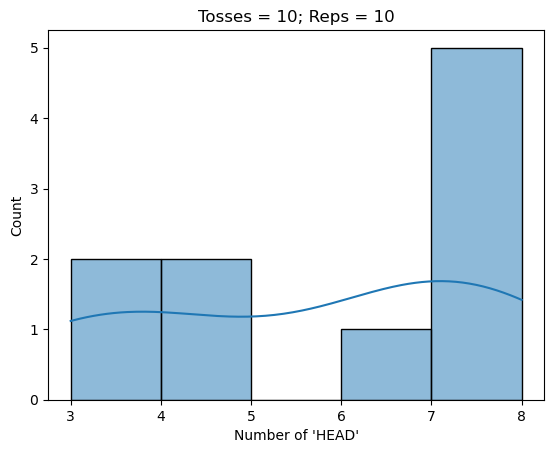

Average probability of 'HEAD' is 0.489


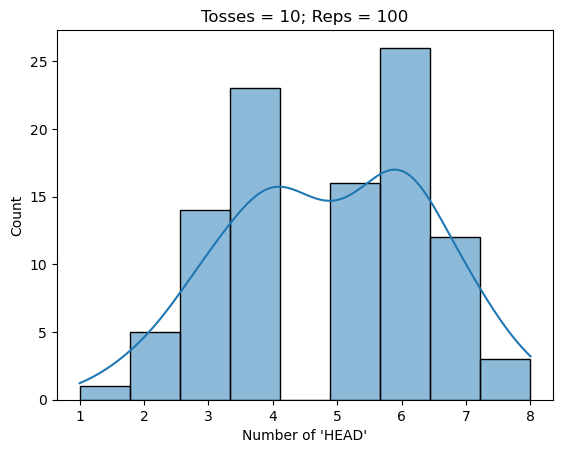

Average probability of 'HEAD' is 0.5007


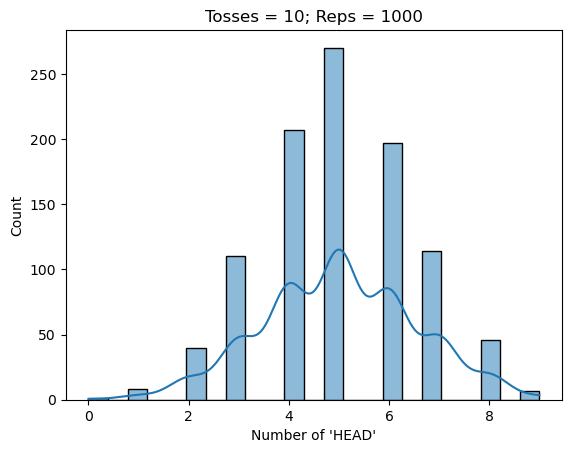

Average probability of 'HEAD' is 0.516


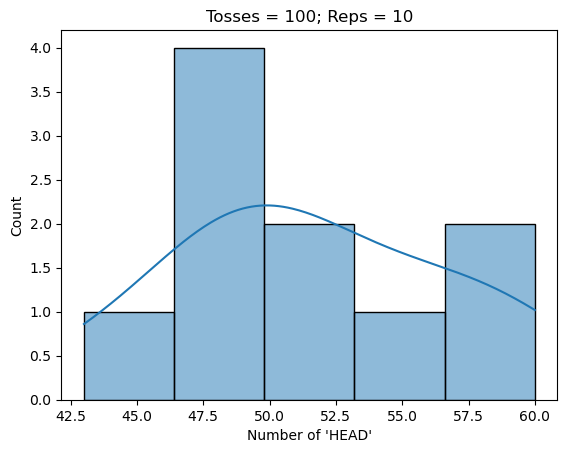

Average probability of 'HEAD' is 0.49420000000000003


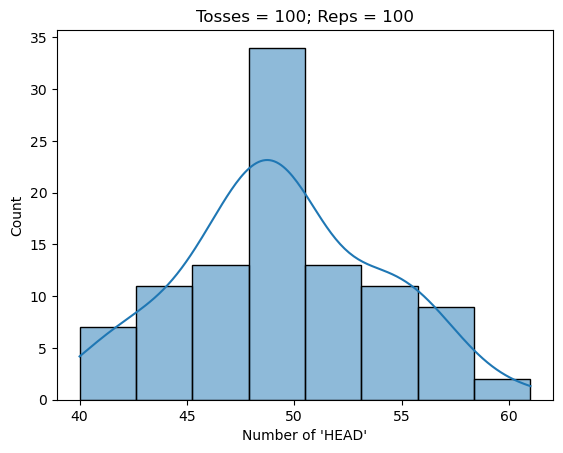

Average probability of 'HEAD' is 0.49889


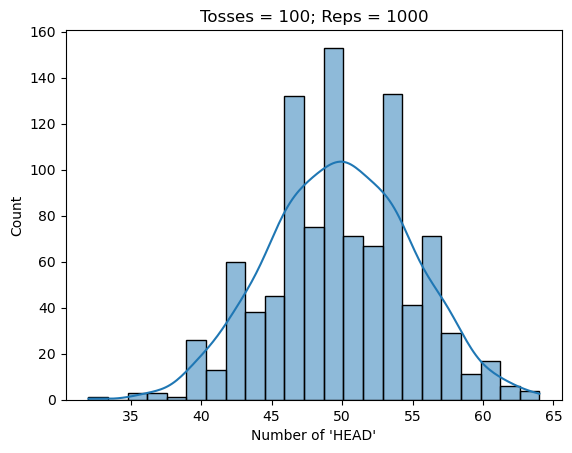

In [2]:
#%% Monte Carlo simulation of a fair coin toss
# (modified from askpython.com)
# using random module to access random number from various distributions
import random as rd

# data analysis modules
import pandas as pd
#import statsmodels as sm
import numpy as np
import scipy as sp

# data visualisation modules
import seaborn as sns
import matplotlib.pyplot as plt

#import random module to use for the random toss
def faircoin(ntoss):
    """
    Parameters:
    ntoss : int (number of tosses)

    Description:
    Toss a fair coin which has two possible outcomes ('HEAD' or 'TAIL') with
    the probability of the outcome is 'HEAD' is = 0.50

    Returns:
    A list containing the outcomes of the tosses
    """
    #This is the list of toss outcomes
    tosses = []

    #toss the coin ntoss times
    for i in range(ntoss):
        
        #draw from a uniform probability distribution on [0,1] interval
        #50% of random draws from this distribution will have value<0.5
        drawuni = rd.uniform(0, 1)
        
        if drawuni < 0.5:
            tosses.append('HEAD')
        else:
            tosses.append('TAIL')
        
    return tosses

ntoss = 5
tosses = faircoin(ntoss)    
print(tosses)
nheadcnt = tosses.count('HEAD')
print(f"Number of times 'HEAD' is observed: {nheadcnt}")

def MC_cointoss(nreps, ntoss):
    """
    
    Parameters
    ----------
    ntoss : int (number of tosses)
    nreps : int (number of Monte Carlo replications )
        
    Description
    -----------
    Call faircoin() function to draw fair coin toss {ntoss} times.        
    Then, the set of tosses in each draw is replicated {nreps} times.

    Returns
    -------
    nhead and phead are lists of number of 'HEAD' and Prob[HEAD] for each 
    Monte Carlo replication

    """  
    
    nhead=[]
    phead=[]
    
    # do Monte Carlo replication draw nreps times
    for i in range(nreps):
        
        #toss the coin ntoss times           
            
        #resultdf['draw'+str(i)]= faircoin(ntoss)
        nheadcnt = faircoin(ntoss).count('HEAD')
        nhead.append(nheadcnt)
        phead.append(nheadcnt/ntoss)
    return nhead, phead

# Conduct the monte carlo similation of coin toss
nreps=[10, 100, 1000]
ntoss = 10
for i in nreps:
    nhead, phead = MC_cointoss(i, ntoss)
    print(f"Average probability of 'HEAD' is {pd.Series(phead).mean()}")
    tosshist = sns.histplot(x=nhead, kde=True)
    tosshist.set(title = f"Tosses = {ntoss}; Reps = {i}", xlabel="Number of 'HEAD'")
    plt.show()
    
ntoss = 100
for i in nreps:
    nhead, phead = MC_cointoss(i, ntoss)
    print(f"Average probability of 'HEAD' is {pd.Series(phead).mean()}")
    tosshist = sns.histplot(x=nhead, kde=True)
    tosshist.set(title = f"Tosses = {ntoss}; Reps = {i}", xlabel="Number of 'HEAD'")
    plt.show()



### Characterising random variables

#### Probability distribution, mean and variance of random variable

Data generating process of a random variable is defined by their PDF (Probability Density Function) and CDF (Cumulative Density Function). In Mathematical notations (for the case of discrete random variables): <br>
Probability density function: $f(x) = Prob[X=x]$ for all $x$ such that $\sum_{x} f(x) = 1$. <br>
Cumulative probability distribution: $F(𝑥)=Prob[X ≤ x]$ <br>

The mean and variance are also called the first and second moments of the probability distribution. Knowing these two moments can help us to understand better about the random variable. If $x$ and $y$ are two random variables, then:

Mean: $\mu_x = E[x]$ = $\sum_{x} x f(x)$ <br>
Variance: $var x = E[(x - \mu_x)^2]$ <br>
Covariance: $cov(x,y) = E[(x-\mu_x)(y-\mu_y)]$

#### Normal distribution

If X is a Normal random variable, then $X~N(\mu, \sigma^2)$, where the PDF is $f(x) = (1/{\sigma\sqrt{2\pi}}) e^{-(x-\mu)^2/2\sigma^2}$, the mean is $E[X]=\mu$ and the variance is $var[x]=\sigma^2$. The following plot shows the PDF of Normal Distribution with mean $\mu$ = 0 and several values of the variance ($\sigma^2$) 

![normal](normal.png)


#### Standard Normal random variable
If $𝑋$ is ~ 𝑁(0,1), then it is a standard Normal random variable. In this case,  $\mu_x = 𝐸[𝑥]=0$ and $𝑣𝑎𝑟 𝑥=𝐸[(𝑥−𝜇_𝑥 )^2 ]=1$, and the PDF simplifies to $𝑓(𝑥)=  (1/2𝜋) 𝑒{(−𝑥^2/2)}$

![stdnormal](stdnormal.png
)

The Normal and Standard Normal distributions have important valuable properties. For examples:
- Many common natural phenomena are normally distributed.
- They are also called Gaussian distributions because most random noises are distributed Normal.
- Sample means, which are important to make population inferences for sample data, are distributed Normal.
- Large sample are usually distributed Normal (e.g. Central Limit Theorem)


#### Population and sample characteristics

If we have the population data of random variables X and Y, we can characterise them based on their first and second moments:

![population characteristics](populationrv3.png)

If we have the sample data of random variables X and Y, we can characterise them based on the first and second moments and then make inferences to characterise the population.

![sample characteristics](samplerv3.png)



## Model Parameter Estimation

### How to estimate the betas ($\beta_1$, $\beta_2$)

Consider the following regression models:

- Population model: $𝑦_𝑖=𝛽_1+𝛽_2 𝑥_𝑖+𝜀_𝑖$
- Sample model: $𝑦_𝑖=𝑏_1+𝑏_2 𝑥_𝑖+𝑒_𝑖$
<br>

To estimate the betas parameters: 
- Get (random) sample data of $𝑦_𝑖$ and $𝑥_𝑖$
- We want to compute ($𝑏_1$, $𝑏_2$) using the sample data to be used as estimates of (𝛽_1,𝛽_2). 

The question is how?

### How to make population inference from sample regression model

Furthermore, if we have data of all household $i$ in the "population", then in theory we can estimate the population parameters $\beta$'s in the _population regression equation_: <br>
<br>
$y_i = \beta_1 + \beta_2 x_i + \epsilon_i$ <br>
<br>

However, often it is impossibly costly to get and analyse population data. Thus, we often neet to use sample data which are ideally randomly drawn from  and representative of the population. Since we use sample data, we will have to make statistical inferences:
- Conclusions about a population based on sample data analysis. 
- Great care must be taken when drawing inferences. 
- The inferences are particular to the sampled population.

In our simple linear regression model, for every $𝑖^{𝑡ℎ}$ observation in the sample, the _sample regression equation_ is as follows:  <br>

$y_i = b_1 + b_2 x_i + e_i$ <br>

An alternative sample regression equation may look like: <br>

$y_i$ = $\hat\beta_1$ + $\hat\beta_2 x_i + e_i$ <br>

The use of sample parameter notations ($b$ and $\hat\beta$) to emphasise that they are not the true parameters ($\beta$). The following diagram illustrates the relationship between different sample parameter estimates and the true population parameters for the simple linear regression model.

![populationregression](populationregression2.png)


The following diagram illustrates the relationship between different sample parameter estimates for the fair coin toss and the true population parameters.

![cointoss](cointoss.png)

Given our objective of understanding the true relationship between X and Y as summarised by the $\beta$ parameters in the population regression equation, we also need to know how good is our sample parameter estimates (the $b$ s and $\hat\beta$ s).

### Ordinary Least Square (OLS)

The OLS estimator is based on minimisation of the squared of the error terms. Denote the OLS fitted line as: <br>
$ \hat𝑦_i = 𝑏_1 + 𝑏_2 𝑥_𝑖 + 𝑒_𝑖 $ <br>
and denote another candidate fitted line as: <br>
$ \hat𝑦_𝑖 = \hat𝑏_1 + \hat 𝑏_2 𝑥_𝑖 + \hat𝑒_𝑖. <br>

Then, the OLS estimators 𝑏_1 and 𝑏_2 defined as: <br>

![OLS](olsestimators.png)

will produce smaller sum of squares of residuals (SSE) than the alternative estimators ($\hat𝑏_1$ and $\hat𝑏_2$). In fact, OLS estimators produce the smallest SSE compared to any other estimator.

In fact, according to the Gauss-Markov Theorem, the OLS estimator is BLUE (Best Linear Unbiased Estimator). Some assumptions are required to reach this conclusion, as listed in the diagram below: <br>

![OLS assumptions](olsassumptions.png)



### Doing OLS with statsmodels

The following Python codes example show how we can estimate a simple linear regression parameters with the Ordinary Least Squares (OLS) estimator using the `ols` function in the `statsmodels` package. Specifically, we estimate the following simple hedonic price regression model based on Melbourne Units sale data.

#### The regression model

The research question is: how much higher is the expected Unit price in Melbourne if the Building Area is 1 $m^2$ larger? <br>

To answer this research question, we estimate the following simple regression model: <br>

$ ln[Price_i] = b_0 + b_1 BuildingArea_i + u_i $ <br>

where 
- $i$ indexes each single Unit in the sample
- $ln[.]$ denotes natural logarithmic transformation
- $Price_i$ denotes sold price of Unit $i$ in current Australian dollars
- $BuildingArea_i$ denotes the size of Unit $i$'s building area


We will estimate this modelin using Melbourne house sale price data. The data file (available on Canvas) is a CSV file: 'Melbourne_housing_FULL.csv' taken from [Kaggle](https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market/versions/27?resource=download). As described in the Kaggle's website, “This data was scraped from publicly available results posted every week from Domain.com.au, I've cleaned it as best I can, now it's up to you to make data analysis magic. The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D”. <br>

List of variable (column) names: 'Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG’, 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car’, 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude’, 'Longtitude', 'Regionname', 'Propertycount', 'logPrice'.

#### Exploratory Data Analysis

Before we estimate the regression model using the specified data, we conduct some exploratory analysis. In particular, we visualise the data to spot if there are any potentially significant outliers that we need to handle. Real estate prices are determined by both objective and subjective valuation. Usually, subjective valuation and other unobserved factors could lead to outliers that we could not handle and may bias our parameter estimates (we usually do not know the determinants of a subjective valuation). In fact, our EDA reveals a few potential outliers associated with building area >=400. After comparing scatter plots with and without the outliers, we conclude that the data appear to be more reasonable (i.e. more respresentative of a normal real estate valuation based on observed objective determining factors) after we dropped the outliers. We then proceed 
with estimating the hedonic model.

```{note}
Before excluding or dropping outliers, make sure that the reason for the outliers and their potential implications on the estimated parameters are well understood.
```

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

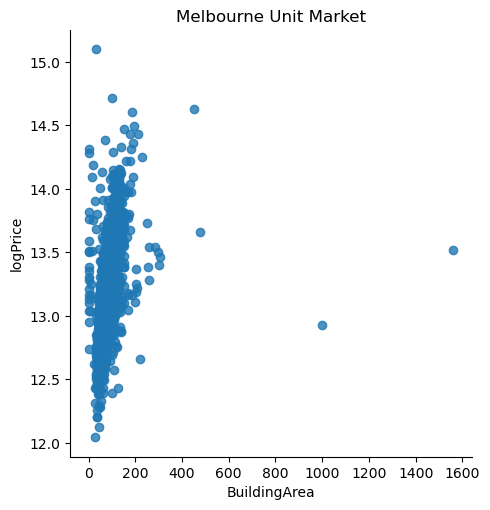

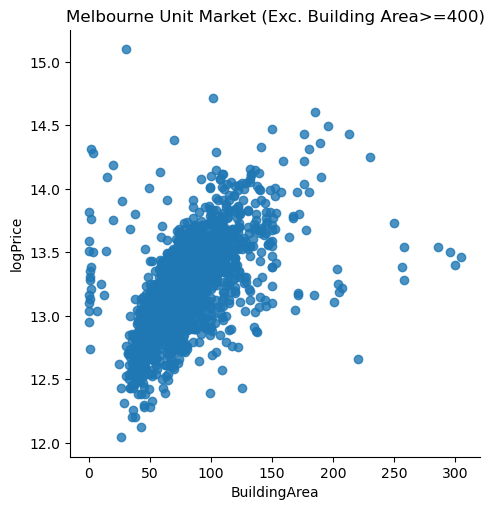

In [3]:
#%% Exploratory Data Analysis

# Load Melbourne housing price data
# (Source: https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market/versions/27?resource=download)
melb_df = pd.read_csv('Melbourne_housing_FULL.csv')
melb_df.info()

#compute log(price)
melb_df['logPrice'] = np.log(melb_df['Price'])

# we want to model only Units (i.e. exclude Houses and Townhouses)
unit_df = melb_df[melb_df.Type=='u']
print(f"Average unit price = AU$ {unit_df.Price.mean():.0f}")
print(f"Average unit building area = {unit_df.BuildingArea.mean():.1f} m2")

# Visualisation using seaborn lmplot
gunit=sns.lmplot(data=unit_df, x='BuildingArea', y='logPrice', 
                 fit_reg=False)
gunit.set(title='Melbourne Unit Market')

# Exclude a few outliers with building area >=400
unitx_df = unit_df[unit_df.BuildingArea<400]
print(f"Average unit price (exc. BuildingArea>=400) = AU$ {unitx_df.Price.mean():.0f}")
print("Average building area (exc. BuildingArea>=400)" +
      f" = {unitx_df.BuildingArea.mean():.1f} m2")

# Visualise the data without the outliers
gunitx = sns.lmplot(data=unitx_df, x='BuildingArea', y='logPrice', fit_reg=False)
gunitx.set(title='Melbourne Unit Market (Exc. Building Area>=400)')

# Now the data look more reasonable after we dropped the outliers, we proceed 
# with estimating the hedonic model


#### Two ways to use statsmodels for regression estimation

Given the reqression equation:

$ ln[Price_i] = b_0 + b_1 BuildingArea_i + u_i $ <br>

There are two ways to estimate regression model using statsmodels:
- By specifying the formula (i.e. the regression equation)
```python

#import the formula module of statsmodels
import statsmodels.formula.api as smf

#load the data
unit_df = melb_df[melb_df.Type=='u']

#specify the formula (i.e. the model)
unitreg = smf.ols('logPrice ~ BuildingArea', data=unit_df)
```
- By specifying the endogenous (dependent) and exogenous (independent) variables
```python

#import the formula module of statsmodels
from statsmodels.regression.linear_model import OLS

#load the data
unit_df = melb_df[melb_df.Type=='u']

#specify the formula (i.e. the model)
unitreg2 = OLS(endog=unit_df[‘logPrice’], exog=unit_df[['const', ‘BuildingArea’]], missing='drop')
```

```{note}
In the second approach, the exogenous variable list must include the constant term for the intercept.
```

##### Using the formula approach of statsmodels

The Python codes example below specifies the formula/model, fits (i.e., estimate) the model, and then prints the estimates using the .summary() method of the fitted model object. The results can be summarised and interpreted as follows:
- Fitted equation: $ ln[Price_i] = 12.7251 + 0.0062 BuildingArea_i
- The estimated slope ($\hat b_1$ = 0.0062) suggests that a one $m^2$ increase in Building Area is associated with a 0.62% increase in expected (i.e. average) sold price of Units in Melboure. From our EDA, we found the average sold price of Melbourne units is \$591,516. Therefore, an additional $1m^2$ is associated with $0.62\%$ x \$591,516 = \$3,667.

In [4]:
#%% Using the formula approach of statsmodel

#import the formula module of statsmodels
import statsmodels.formula.api as smf

#specify the formula (i.e. the model)
unitxreg = smf.ols('logPrice ~ BuildingArea', data=unitx_df)

# now, fit (ie. estimate) the model
unitxresult = unitxreg.fit()

print(unitxresult.summary())
print(f"b1_hat = {unitxresult.params['BuildingArea']}")
print(f"SE(b1_hat) = {unitxresult.bse['BuildingArea']}")


                            OLS Regression Results                            
Dep. Variable:               logPrice   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     788.1
Date:                Wed, 23 Jul 2025   Prob (F-statistic):          5.63e-144
Time:                        09:04:21   Log-Likelihood:                -407.01
No. Observations:                1790   AIC:                             818.0
Df Residuals:                    1788   BIC:                             829.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       12.7251      0.019    667.851   

##### Using the endogenous/exogenous list approach in statsmodels

The Python codes example below re-estimate the simple regression of Unit price on Building Area with statsmodels by supplying the endogenous/exogenous variable lists. The results reported by the .summary() method are identical. Notice however we need to use statsmodels' add_constant() function to insert the intercept terms into he input data frame as shown by the statement:
```pyhon
unitx2_df = add_constant(unitx_df, has_constant='add')
```
Then, in the list of exogenous variables, we need to include the newly added 'const' column.

In [5]:
#%% The endog/exog way to estimate the same regression

#import add_constant from statsmodels to for adding a constant to the data (e.g. unit_df)
from statsmodels.tools.tools import add_constant
from statsmodels.regression.linear_model import OLS

# (Source: https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market/versions/27?resource=download)
melb_df = pd.read_csv('Melbourne_housing_FULL.csv')

#compute log(price)
melb_df['logPrice'] = np.log(melb_df['Price'])

# we want to model only Units (i.e. exclude Houses and Townhouses)
unit_df = melb_df[melb_df.Type=='u']

# Exclude a few outliers with building area >=400
unitx_df = unit_df[unit_df.BuildingArea<400]

# Add a 'const' column (a column with value of 1)
unitx2_df = add_constant(unitx_df, has_constant='add')
print('Column names after add_constant call', unitx2_df.columns)

#specify the estimation model
unitreg2 = OLS(endog=unitx2_df['logPrice'], 
    exog=unitx2_df[['const', 'BuildingArea']], missing='drop')
print(unitreg2.fit().summary())

Column names after add_constant call Index(['const', 'Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method',
       'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom',
       'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea',
       'Lattitude', 'Longtitude', 'Regionname', 'Propertycount', 'logPrice'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:               logPrice   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     788.1
Date:                Wed, 23 Jul 2025   Prob (F-statistic):          5.63e-144
Time:                        09:04:21   Log-Likelihood:                -407.01
No. Observations:                1790   AIC:                             818.0
Df Residuals:                    1788   BIC:                             829.0
Df Model:     

### Population Parameter Inference

Given the estimated regression parameters using a sample of Melbourne Unit sale price data, what can we say about the population parameters? <br>

In other words, if our estimated model based on a single draw of the sample is: 

$l𝑜𝑔𝑃𝑟𝑖𝑐𝑒_𝑖=13.0254+0.0062 ∗𝐵𝑢𝑖𝑙𝑑𝑖𝑛𝑔𝐴𝑟𝑒𝑎_𝑖 + 𝑢_𝑖$

how certain are we with the above estimate in terms of the true population regression parameters:

$l𝑜𝑔𝑃𝑟𝑖𝑐𝑒_𝑖 = \beta_0 + \beta_1 * 𝐵𝑢𝑖𝑙𝑑𝑖𝑛𝑔𝐴𝑟𝑒𝑎_𝑖 + 𝜀_𝑖$

For example, is the true population slope of the regression is strictly positive ($\beta_1 > 0$) as indicated by the sample estimated slope value of 0.0062? Or is it more like $\beta_1 = 0$? In other words, is the slope statistically significant? 

These questions are questions about statistical inference based on sample estimates. The results summary of statsmodels provide the answers. In the summary, we find that the standard error (`std err`) for the BuildingArea slope is 0.000 with an associated t-statistics value of 28.073, probability significance value (or p-value or P>|t|) of 0.000, and 95% confidence interval of [0.006, 0.007]. All these mean the true population slope parameter value is most likely positive between 0.006 and 0.007. 

#### Regression coefficient hypothesis testing

Given the above population regression parameters, we may want to consider any of the following test hypotheses with respect to the slope parameter value ($\beta_1$):
- One-sided test. $H_0: \beta_1 = 0$ against $H_1: \beta_1 > 0$. 
- Two-sided test. $H_0: \beta_1 = 0$ against $H_1: \beta_1 \neq 0$. 
- One-sided test on specific value. $H_0: \beta_1 = 6.0$ against $H_1: \beta_1 > 6.0$. 

More generally, the steps to conduct hypothesis tests of population regression parameters based on the sample fitted regressions are:
- Specify the null ($𝐻_0$) and alternative hypothesis ($𝐻_1$)
- Specify the test statistics and the sampling distribution and calculate the (sample) value of the test statistics  under the null (that is, if 𝐻_𝑜 is true)
- Choose significance level and determine the critical value (rejection region)
- State the conclusion based on the decision rule

For the linear regression model, the test statitics is <br>

$t_{stat} = \frac{\hat\beta_1 - \beta_1}{std.err(\hat\beta_1)}$ \~ $t_{n-k-1}$ (Student's t distribution with degree of freedom = n - k - 1 where n is the sample size and k is the number of regressor).

<br>

If $H_0: \beta_1 = 0$, then under the null: $t_{stat} = \frac{\hat\beta_1 - 0}{std.err(\hat\beta_1)} = \frac{\hat\beta_1}{std.err(\hat\beta_1)} $

For the significance level, (or also called test size), we usually choose $\alpha = 0.05 or 0.01$. This significance level is chosen to minimise the probability of Type 1 error (Type 1 error = Error of rejecting the true null hypothesis). In a two-sided test, the rejection region is defined as the area to the left of −$𝑡_{𝑐𝑟𝑖𝑡}$ and to the right of $𝑡_{𝑐𝑟𝑖𝑡}, where for the two-sided test, each rejection region is of the size 𝛼/2 <br>

![twosidedtest](twosided.png)

For the one-sided test, 𝑡_𝑐𝑟𝑖𝑡 is chosen such that the total rejection region is equal to 𝛼 (e.g. 0.05).

![onesidedtest](onesided.png)

A rule of thumb value for $t_{crit}$ is 2. So, in our regression example, the t-stat for $\hat\beta_1$ is 28.073 > 2. Thus, we reject the null hypothesis $H_0: \beta = 0$. 


#### Regression coefficient p-value

The statsmodels' reported p-value (P>|t|) for the slope coefficient ($\beta_1$) is the probability of observing a sample if $𝐻_0: beta_1 = 0$ is true. So, the smaller the p-value the more likely to reject $𝐻_0$. If the chosen significance level 𝛼 = 0.05, then a p-value less than 0.05 indicates rejection of $𝐻_0$. <br>

Thus, in our regression example, statsmodels reported P-value = 0.000. That is, the probability that the sample data come from a population where 𝐻_0 is true is almost zero. Thus, 𝐻_0 must not be true.

#### Interval estimates (i.e. confidence interval)

The unshaded area in the probability density curve between $-t_{𝑐𝑟𝑖𝑡}$ and $-t_{𝑐𝑟𝑖𝑡}$ has a size of $1 − \alpha$, which is the probability of observing the sample data (i.e. $𝑡_{𝑠𝑡𝑎𝑡}$). 

![twosidedtest](twosided.png)

Given this, and that $𝑡_{𝑠𝑡𝑎𝑡} = \frac{(\hat\beta_1 − \beta_2)} {𝑠td.𝑒rr(\hat\beta_2)}$, and after some algebra: <br>

$Prob[\hat\beta_2 − 𝑡_{𝑐𝑟𝑖𝑡} \times 𝑠td.𝑒rr.(\hat\beta𝛽_2) ≤ \beta_2 ≤ \hat\beta_2 + 𝑡_{𝑐𝑟𝑖𝑡} \times 𝑠td.𝑒rr.(\hat\beta2)] = 1 − \alpha$ 

<br>
So, the $1 − \alpha$ confidence interval for $\beta__2$ is given by the interval:

$(\hat\beta𝛽_2 − 𝑡_{𝑐𝑟𝑖𝑡} \times 𝑠td.𝑒rr.(\hat\beta_2), \hat\beta_2 + 𝑡_{𝑐𝑟𝑖𝑡} \times 𝑠td.𝑒rr.(\hat\beta_2))$

For our regression example, for $\alpha=0.05$, statsmodels' results show that the (1-0.05)\% confidence interval for $\beta_1$ is (0.006, 0.007)

### Goodness-of-fit

To measure the goodness of fit of simple linear regression we compare the in-sample predicted values $(\hat y)$ to the actual values $(y)$. The following Python codes use Matplotlib pyplot to produce a scatter plot of the predicted and actual values. 

statsmodels' summary also produces more direct measures of goodness of fit of the regression:
- _R-squared_: 0.306 (This measures the proportion of the variation in the data which is explained by the estimated regression model. The value range [0,1])
- _Adj. R-Squared_: 0.306. This is similar to R-squared, but it penalised the number of regressors included in the model. We use this measure instead of R-squared if we are comparing estimated regression models with different number of regressor. This is to account for the fact that increasing the number of regressor can never lower the R-squared value.
- F-statistics: 788.1 (with Prob F-statistic = 0.000). Use this to make a joint null hypothesis that all $\beta$ 's are zeros.
- Log-likelihood: -407.1. We use this measure to compare the goodness of fit of different models by assessing how likely the sample data is implied by the population's data generating process.



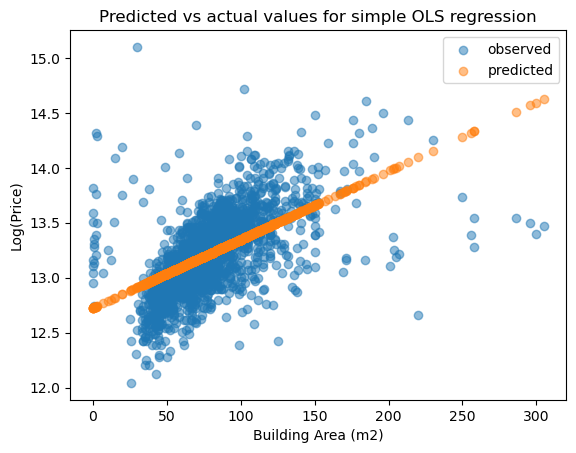

In [6]:
#%% Plotting predicted (yhat) vs actual (y)

# Drop missing observations from whole sample
df_plot = unitx_df.dropna(subset=['logPrice', 'BuildingArea'])

# Plot predicted values
fig, ax = plt.subplots()
ax.scatter(df_plot['BuildingArea'], df_plot['logPrice'], alpha=0.5, label='observed')
ax.scatter(df_plot['BuildingArea'], unitxresult.predict(), alpha=0.5, label='predicted')
ax.set_xlabel('Building Area (m2)')
ax.set_ylabel('Log(Price)')
ax.set_title('Predicted vs actual values for simple OLS regression')
ax.legend()

# Question: Can you recreate the chart using Seaborn Objects and use "line" as marks for the "predicted" plot?


### Comparing estimated models

Often we want to compare the coefficient estimates from different models due to the use of different sample and/or slightly different estimating equation. Using statsmodels.iolib library, we can quickly create a side-by-side comparison table of different models as shown in the following example. In the example, we compare the same regression equation but estimated with two slightly different samples: with outliers and without the outliers identified previously. As can be seen from the comparions, the model estimated without the outliers has a higher goodness-of-fit and the estimated main regression slope of $\beta_1$ is about 3 times as large.

In [7]:
#%% Comparing estimation with and without outliers

#specify the formula (i.e. the model) with outliers
unitreg = smf.ols('logPrice ~ BuildingArea', data=unit_df)

# now, fit (ie. estimate) the model
unitresult = unitreg.fit()

#print(unitresult.summary())
#print(f"b1_hat = {unitresult.params['BuildingArea']}")
#print(f"SE(b1_hat) = {unitresult.bse['BuildingArea']}")


from statsmodels.iolib.summary2 import summary_col

info_dict={'R-squared' : lambda x: "{:.2f}".format(x.rsquared),
           'No. observations' : lambda x: "{0:d}".format(int(x.nobs))}

results_compare = summary_col(results=[unitxresult,unitresult],
                            float_format='%0.4f',
                            stars = True,
                            model_names=['Without outliers',
                                         'With outliers'],
                            info_dict=info_dict,
                            regressor_order=['BuildingArea',
                                             'const'])

results_compare.add_title('Table - OLS Regressions')

print(results_compare)

            Table - OLS Regressions
                 Without outliers With outliers
-----------------------------------------------
BuildingArea     0.0062***        0.0024***    
                 (0.0002)         (0.0002)     
Intercept        12.7251***       13.0254***   
                 (0.0191)         (0.0146)     
R-squared        0.3059           0.1260       
R-squared Adj.   0.3055           0.1255       
No. observations 1790             1794         
R-squared        0.31             0.13         
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


## Multiple Linear Regression

### Correlation, spurious correlation, and causation

Consider the following charts taken from Tyler Vigen's [website](https://tylervigen.com/spurious-correlations) showing highly correlated time series which may incorrectly suggest a strong causal relationship between each pair of series.

- Does US spending on science, space, and technology increase the suicide incidence or vice versa?

![Suicide incidence](suicide.png)

- Does consuming cheese lead to deaths by bedsheet tangles or vice versa?

![Bedsheet tangles](cheese.png)

- Does US crude oil imports depend per capita consumption of chicken?

![Chicken per capita](chicken.png)

Obviously, the answers to the first two questions above are clearly negative because it is unlikely for us to find any theoretical explanation to the apparent strong but most likely spurious correlation. However, spurious correlations are not always obvious to detect. One may be able to provide theoretical justification for the third spurious correlation between US per capita chicken consumption and crude oil import. Similarly for the case of the correlation between per capita chocolate consumption and the number of Nobel prize winners in a country shown in the scatter plot below. <br>

![Chocolate per capita](chocolate.png)

Indeed, we need to be careful in drawing any causal inference from observed measures of relationship such as correlation because:

__Correlation = Causal effects + Confounding effects__

### Omitted Variable Bias

The presence of confounding effects is the reason why often a simple or even multiple linear regression model is inadequate or misleading. Moving from simple linear regression model to multiple linear regression model by adding more X variables (i.e., more regressors) is aimed at controlling the confounding effects, provided that the potential causes of the confounding effects can be controlled for with observables data. If we do not control for the confounding effect, then our regression estimates may suffer from the _omitted variable bias_ due to spurious correlation. The following examples illustrate some omitted variable bias that could be addressed by multiple linear regression model because we have observables that account for the confounding effects.

#### Nobel Prize and Chocolate Consumption per capita

Simple linear regression: $NobelWon_i = \beta_0 + \beta_1 ChocPerCap_i + e_i$ <br>
where $i$ indexes the country, $NobelWon$ is number of Nobel prizes won by the country, and $ChocPerCap is per capita (kg) chocolate consumption in the country.

One possible source for the confounding effect is cross-country variation in average income. Richer countries are more likely to have higher per capita chocolate consumption and better research and education facilities (which could to more Nobel prize winners). <br>

Multiple linear regression: $NobelWon_i = \beta_0 + \beta_1 ChocPerCap_i + \beta_2 ChocPerCap_i + e_i$ <br>


The estimated regression parameters are:
|Variable    |Coefficient         |Coefficient            |
|            |Simple Linear Model |Multiple Linear Model  |
|------------|-------------------:|----------------------:|
|Const       | -0.825             | -13.034               |
|$ChocPerCap$| 3.08               | 1.762                 |
|$GDPPerCap$ |                    | 0.332                 |

As shown above, just adding one more variable (GDP per capita) almost half the estimated effect of $ChocPerCap$ in the Simple Linear Model. One may argue that there could still be more sources of the confounding effects that we need to add into the multiple linear regression model. Can you think of any regressor to add?

#### Gender vs Earnings

In the next example of omitted variable bias (OVB), we look at if there is evidence for gender bias in earnings which state that, all else equal, female workers receive lower earnings than male workers.

First, we propose to test the Gender Bias hypothesis using a simple linear regression model: 

$log[earnings_i] = \beta_0 + \beta_1 male_i + e_i$ <br>
where $i$ indexes the individual worker, $earnings$ is a measure of income received by the worker, and $male_1 is a dummy variable with value 1 if worker $i$ is male and 0 otherwise. In this case, the gender bias hypothesis can be tested with a null hypothesis: $H_0: \beta_1 > 0$.

Obviously, the gender bias hypothesis may hold if we can ensure that other than the gender, all elses are equalit. Hence, we can immediately question the simple linear model since it does not include any other X-variables to ensure that the "all elses are equal" condition holds. Hence, we also propose two alternative multiple linear regression models:

Multiple linear regression 1: $log[earnings_i] = \beta_0 + \beta_1 male_i + \beta_2 age_i + e_i$ <br>

Multiple linear regression 2: $log[earnings_i] = \beta_0 + \beta_1 male_i + \beta_2 age_i + \beta_3 height_i + e_i$ <br>


The estimated regression parameters are:
|Variable    |Coefficient         |Coefficient            |Coefficient            |
|            |(t-stat)            |(t-stat)               |(t-stat)               |
|            |Simple Linear Model |Multiple Linear Model 1|Multiple Linear Model 2|
|------------|-------------------:|----------------------:|----------------------:|
|Const       | 4.562              | 3.453                 | -2.731                | 
|            |      (169.455)     |        (40.138)       |       (-5.889)        |
|male        | 3.08               | 0.289                 | -0.241                |
|            |       (7.009)      |       (5.161)         |       (-4.306)        |
|age         |                    | 0.028                 | 0.028                 |
|            |                    |       (14.339)        |      (13.339)         |
|height      |                    |                       | 0.037                 |
|            |                    |                       |      (13.567)         |

As shown above, the Simple Linear Model appears to have suffered from a serious omitted variable bias. Its estimates show that Male workers' average earnings are 3$\times$ larger than Female workers'. In fact, as shown by Multiple Linear Model 2 estimates, when we include age and height, the coefficient estimate of male changes to -0.241 with a |t-stat|>2 (i.e. statistically significant negative gender effect). Furthermore, it seems `height` is the main source of the omitted variable bias because when we exclude it from Multiple Linear Model 1, the coefficient estimate of male is still positive and statistically significant.

#### Melbourne Unit Hedonic Price Model

The above OVB discussions suggest that our simple Melbourne Unit price model of the relationship between Unit sold price and Building Area may suffer from omitted variable bias since we do not have any other control variables in the model. Let us now estimate the multiple linear model of the hedonic price index:

$ ln[Price_i] = b_0 + b_1 BuildingArea_i + b_2 Bedroom2_i + b_3 Bathroom_i + b_4 Car_i + b_5 YearBuilt_i + b_6 Distance_i + u_i $ <br>

where 
- $i$ indexes each single Unit in the sample
- $ln[.]$ denotes natural logarithmic transformation
- $Price_i$ denotes sold price of Unit $i$ in current Australian dollars
- $BuildingArea_i$ denotes the size of Unit $i$'s building area
- $Bedroom2_i$ denotes Unit $i$'s number of bedrooms
- $Bathroom_i$ denotes Unit $i$'s number of bathrooms
- $Car_i$ denotes Unit $i$'s number of car spots
- $Landsize_i$ denotes Unit $i$'s size of land ($m^2$)
- $YearBuilt_i$ denotes Unit $i$'s year of build
- $Distance_i$ denotes Unit $i$'s distance from Melbourne CBD ($km$)

The Python codes below produce a comparison of the estimated coefficients (for the simple linear model and multiple linear model) of Melbourne Unit Sold Price. The coefficient estimate for BuildingArea is decreased from 0.62\% to 0.44\% after adding six additional control variables. So, there is Omitted Variable Bias which caused us to overestimate the value of an additional 1$m^2$ building area if we did not control for Unit variation in terms of other house amenities, land size, built year and distance from CBD

In [8]:
#%% Multiple linear hedonic price model for Unit

#specify the formula (i.e. the model) without outliers
unitmreg = smf.ols('logPrice ~ BuildingArea + Bedroom2 + Bathroom + Car' + 
                   '+ Landsize + YearBuilt + Distance ', data=unitx_df)

# now, fit (ie. estimate) the model
unitmresult = unitmreg.fit()

resultsm_compare = summary_col(results=[unitxresult,unitmresult],
                            float_format='%0.4f',
                            stars = True,
                            model_names=['Simple Hedonic',
                                         'Multiple Hedonic'],
                            info_dict=info_dict,
                            regressor_order=['BuildingArea',
                                             'Bedroom2',
                                             'Bathroom',
                                             'Car',
                                             'Landsize',
                                             'YearBuilt',
                                             'Distance',
                                             'const'])

resultsm_compare.add_title('Table - OLS Regressions')

print(resultsm_compare)


            Table - OLS Regressions
                 Simple Hedonic Multiple Hedonic
------------------------------------------------
BuildingArea     0.0062***      0.0044***       
                 (0.0002)       (0.0003)        
Bedroom2                        0.1850***       
                                (0.0140)        
Bathroom                        0.1360***       
                                (0.0199)        
Car                             0.0813***       
                                (0.0142)        
Landsize                        0.0000          
                                (0.0000)        
YearBuilt                       -0.0018***      
                                (0.0003)        
Distance                        -0.0172***      
                                (0.0015)        
Intercept        12.7251***     15.9725***      
                 (0.0191)       (0.5012)        
R-squared        0.3059         0.5328          
R-squared Adj.   0.3055         0

## Binary dependent variable models

### Predicting the risk of coronary heart disease

Let's consider the following research question: How to predict whether a patient has 10-year risk of future (CHD) coronary heart disease using information about the patient’s health and lifestyle characteristics?

We will try to address the research question using a multiple linear regression model of the following format: <br>

Regression model: $𝒚_𝒊 = 𝒃_𝟎 + 𝒃_𝟏 𝒙_{𝟏𝒊} + 𝒃_𝟐 𝒙_{𝟐𝒊} + ... + 𝒃_𝟏𝟒 𝒙_{𝟏𝟒𝒊} + 𝒃_𝟏𝟓 𝒙_{𝟏𝟓𝒊} + 𝒖_𝒊$

which will be estimated using data from the [Framingham heart disease dataset](https://www.kaggle.com/datasets/captainozlem/framingham-chd-preprocessed-data). <br>

Specifically, from the data set, we have the following regression variables to use:

- Dependent variable: $𝑦_𝑖$ is TenYearCHD (10-year risk of coronary heart disease CHD) (This is a binary dependent variable with value: “1”, means “Yes”, “0” means “No”)
- Demographic explanatory variables: 
    - $𝑥_{1𝑖}$  male: 1 if male, 0 otherwise
    - $𝑥_{2𝑖}$ age in years 
- Behavioral explanatory variables: 
    - $𝑥_{3𝑖}$ education: 1 less than high school, 2 high school, 3  1 college degree and higher
    - $𝑥_{4𝑖}$ currentSmoker: 1 if yes, 0 otherwise
    - $𝑥_{5𝑖}$ cigsPerDay: number of cigarettes smoked per day 
- Medical (history) explanatory variables: 
    - $𝑥_{6𝑖}$ BPMeds: 1 if on blood pressure medication, 0 otherwise
    - $𝑥_{7𝑖}$ prevalentStroke: 1 if previously had a stroke, 0 otherwise
    - $𝑥_{8𝑖}$ prevalentHyp: 1 if hypertensive, 0 otherwise
    - $𝑥_{9𝑖}$ diabetes: 1 if had diabetes, 0 otherwise
- Medical(current) explanatory variables: 
    - $𝑥_{10𝑖}$ totChol: total cholesterol level
    - $𝑥_{11𝑖}$ sysBP: systolic blood pressure
    - $𝑥_{12𝑖}$ diaBP: diastolic blood pressure
    - $𝑥_{13𝑖}$ BMI: Body Mass Index
    - $𝑥_{14𝑖}$ heartRate: heart rate
    - $𝑥_{15𝑖}$ glucose: glucose level

#### Scatter plot and Jitters
Before we move on the estimation of the regrression model, let's do some Exploratory Data Analysis of the data set. First, we use Seaborn `regplot` to see the relationship between age and the risk of TenYearCHD. The `regplot` shows two types of plots:
- Scatter plot of the x and y variables (x = age, y = TenYearCHD)
- Line plot of a simple linear regression of y on x: $TenYearCHD = b_0 + b_1 age + u$
From the plot, we note the following:
- The y-axis only has two possible values: 0 or 1. That is, our dependent variable is binary valued.
- Each of the dots representing (x,y) pair may represent more than one pairs (x,y) observations. This is shown in the shape and color of the dots (more overlaps mean more square-shape dots and darker blue; but how the extent of overlap varies across age is a bit harder to see)
- The linear regression line does not have a good fit at all because the line is almost completely above 0 and below 1. In other words, the regression line it rarely overlaps with the observed data points and the error (the gap between regression line and observed actual value of y is increasing with the on 𝑥 values.
- If age is younger than 30, then the probability of having CHD in 10 year may become less than zero! Surely we can't have a negative probabilities.

In fact, those problems we discovered with the linear regression are the main problems of linear probability model for a binary dependent variable.

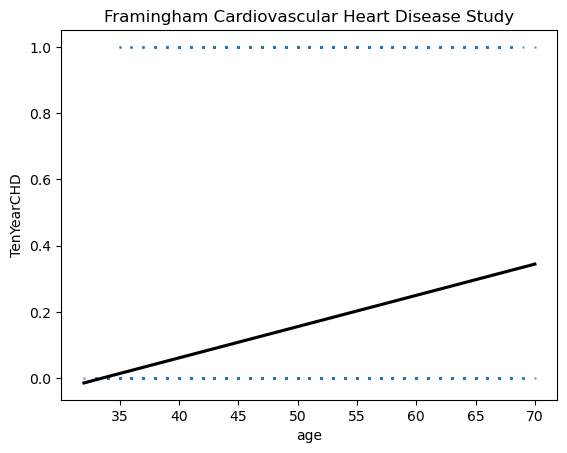

In [9]:
#%% EDA of Framingham cardiovascular heart disease

#Load the heart disease data from Framingham study
#source: https://www.kaggle.com/datasets/captainozlem/framingham-chd-preprocessed-data
#Ref: https://www.framinghamheartstudy.org/
    
fram_df = pd.read_csv('framingham.csv')

import seaborn as sns

#plotting age vs 

gchdage = sns.regplot(x="age", y="TenYearCHD", ci=None, 
                line_kws = {"color":"black"}, 
                scatter_kws = {"s":1, "alpha":0.5},
                data=fram_df)
gchdage.set_title('Framingham Cardiovascular Heart Disease Study')
plt.show()

# Question: Can you produce a similar chart using Seaborn Objects?


We now introduce "jitter" into our plot to reveal more the extend of overlaps in the scatter plot so that we have a better idea of the distribution of the data points along the (x, y)-axes. As can be seen, there seems to be a higher concentration of zero value for TenYearCHD at younger age. This is intuitive, the risk for developing Cardiovacular Heart Disease in 10 times is lower among the younger population. In contras, if we look at the y value of one (meaning yes there is a risk of TenYear CHD), the scatter reveal a relatively higher concentration as age increases. Hence, now we know why the simple regression black line is upward sloping.

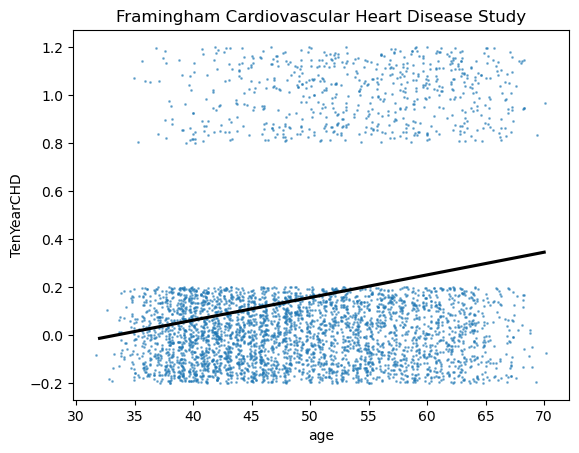

In [10]:
#to get a better idea of the data distribution, we introduce jitter to the plot
gchdage_jitter = sns.regplot(x="age", y="TenYearCHD", ci=None, 
                line_kws = {"color":"black"}, 
                scatter_kws = {"s":1, "alpha":0.5},
                x_jitter = 0.4, y_jitter=0.2,
                data=fram_df)
gchdage_jitter.set_title('Framingham Cardiovascular Heart Disease Study')
plt.show()


#### Linear probability model of TenYearCHD

The Python codes below use statsmodels to estimate the binary dependent variable model specified above as a linear probability model. In addition to the estimation summary, we also utilise [statsmodels.graphics](https://www.statsmodels.org/dev/generated/statsmodels.graphics.regressionplots.plot_regress_exog.html) library to produce four different types of regression plots:
- Y and Fitted vs. X
- Partial regression plot
- Residuals versus age
- CCPR plot

These plots are useful for a quick identification of model fit problem. For example, they clearly reveal how the fit of the model depends on the value of the explanatory variable (we only show for the case of 'age' as the explanatory variable).

                            OLS Regression Results                            
Dep. Variable:             TenYearCHD   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     27.34
Date:                Wed, 23 Jul 2025   Prob (F-statistic):           1.21e-73
Time:                        09:04:22   Log-Likelihood:                -1250.8
No. Observations:                3658   AIC:                             2534.
Df Residuals:                    3642   BIC:                             2633.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.5763      0.079     

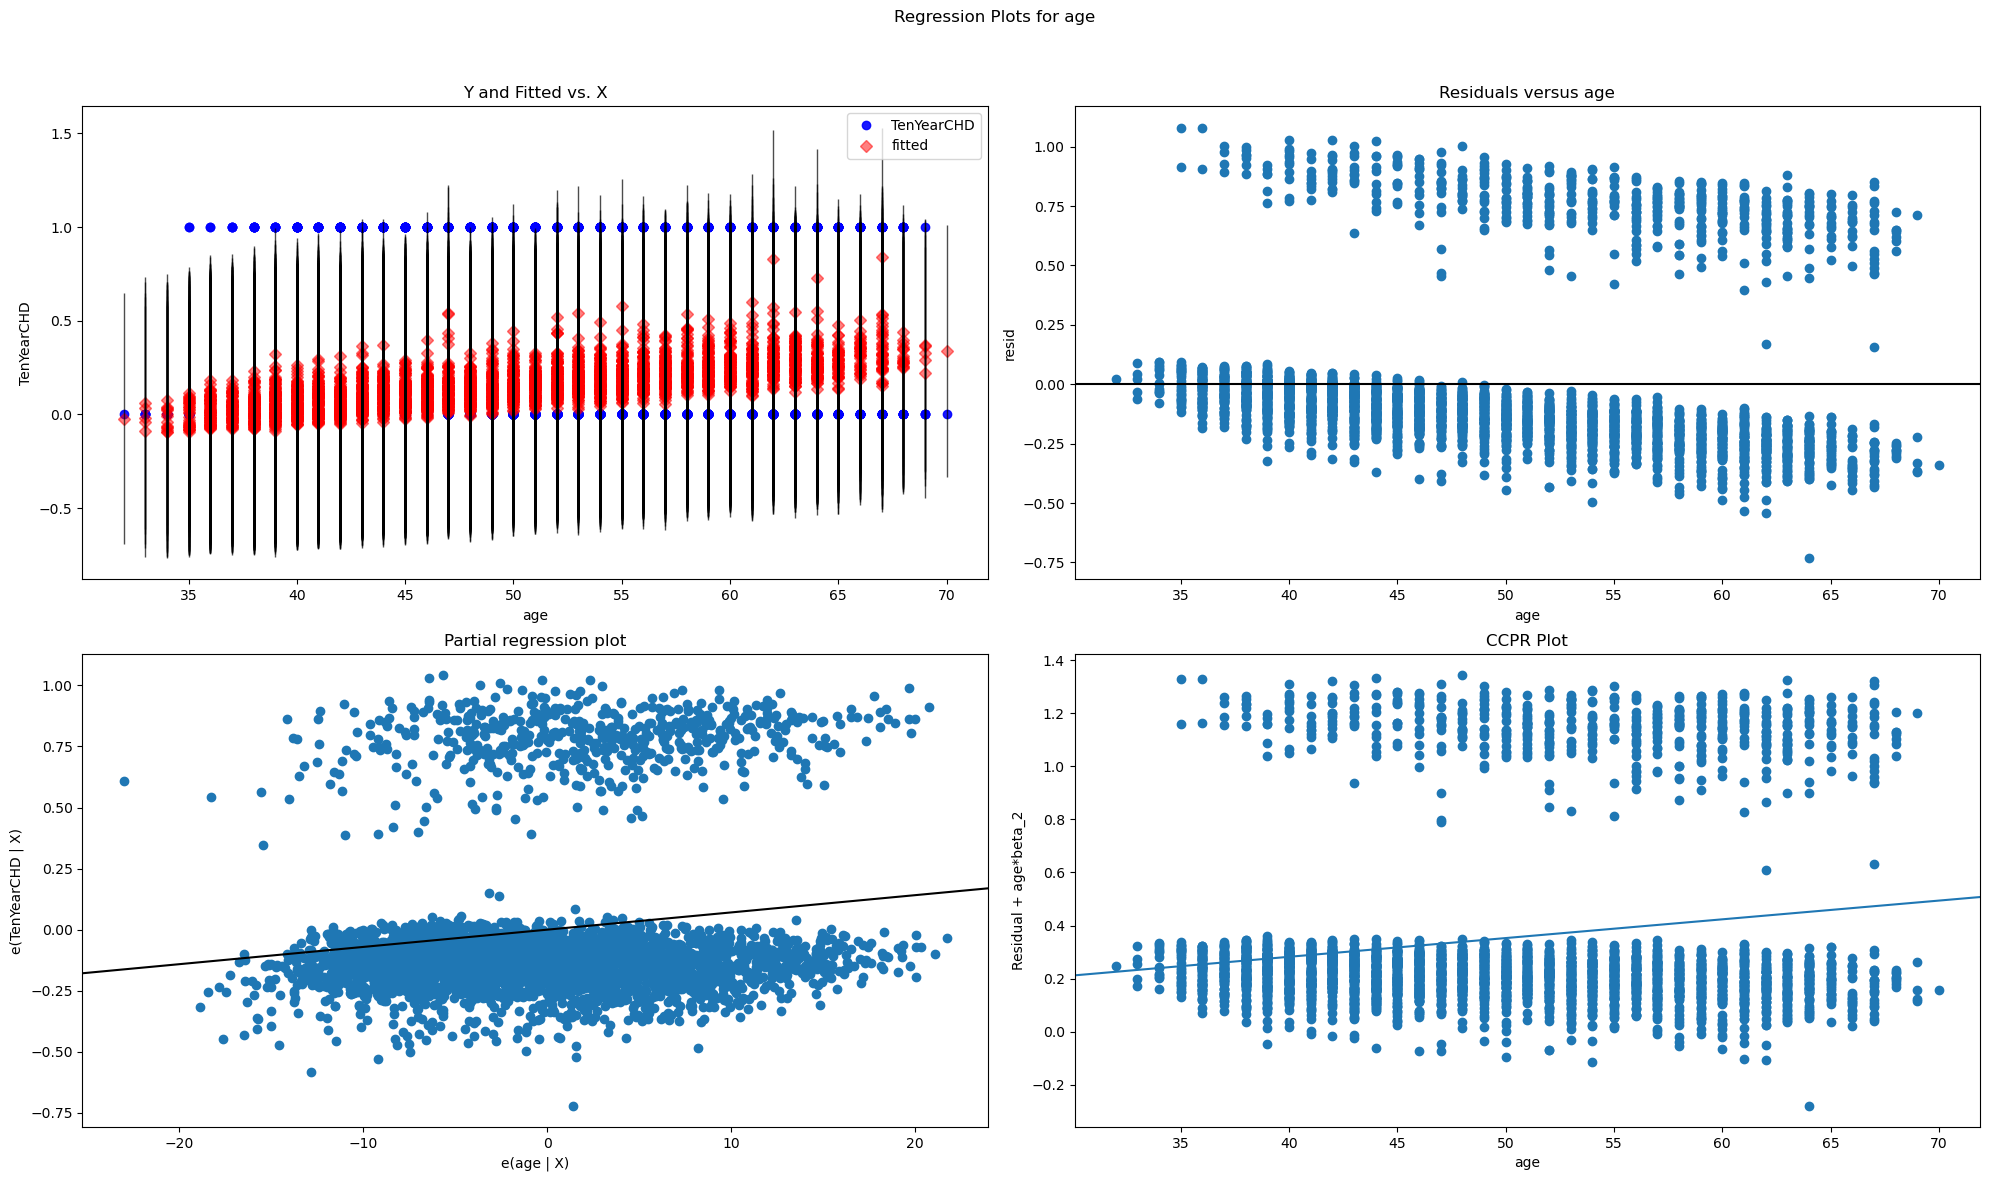

In [11]:
#%% Now estimate the full linear probability model

#import the formula module of statsmodels
import statsmodels.formula.api as smf

#specify the formula (i.e. the model)
equmodel = ('TenYearCHD ~ male + age + education + currentSmoker +' + 
            'cigsPerDay + BPMeds + prevalentStroke + prevalentHyp+'  +
            'diabetes + totChol + sysBP + diaBP + BMI + heartRate + glucose') 
lpmreg = smf.ols(equmodel, data=fram_df)

lpm_result = lpmreg.fit()
print(lpm_result.summary())

import statsmodels.api as sm

# creating regression plots
# ref: https://www.statsmodels.org/dev/generated/statsmodels.graphics.regressionplots.plot_regress_exog.html
fig = plt.figure(figsize=(20, 12))
fig = sm.graphics.plot_regress_exog(lpm_result,'age', fig=fig)

# plot fitted value vs age#
#fig, ax = plt.subplots(figsize=(12, 8))
#fig = sm.graphics.plot_fit(lpm_result, "age", ax=ax)

#### LPM may not be the best for regressions with binary dependent variable

- It can be shown that the Linear Probability Model parameter estimates are still unbiased (good, but ...)
- The LPM suffers from heteroskedasticity problem. That is variance of the error terms changes with the value of X variable. This means the LPM is no longer Best (it does not produce the smallest variance).
- The error term is not Normal distribution because for each 𝑖, the error term can only takes two possible values. 
- It may have problematic interpretation because it has a constant marginal effect. The constant marginal effect (slope) can leads to negative predicted probability value or predicted probability value greater than one. This is an interpretation problem because the theoretical values of the dependent variable are either 0 or 1. In other words, the fitted line of a linear probability model can be negative (less than zero) or greater than one. If we interpret the 0-1 values as probability, then we cannot theoretically have a negative probability value nor a probability value greater than 1.

### A better model for binary dependent variable?

To get a better model than the LPM when we have a binary dependent variable, we need to use a non-linear function whose theoretical values lie between 0 and 1. In fact there are many S-shape sigmoid functions that we can use including:
- Standard Normal Cumulative Distribution Function (probit model)
- Logistic Cumulative Distribution Function (logit model)
- (and many others: can you find an example?)

The following diagram illustrate the difference between a logistic (or logit) regression model based on the s-shaped sigmoid non-linear logit function and a linear probability regression model based on a linear function. <br>

![Logit vs LPM](logitlpm.png)

#### Logit model specification

Denote the logistic probability density function (PDF) as: $\lambda(l) = \frac{e^{-l}}{(1+e^{-l})^2}$ and <br>
logistic cumulative distribution function (CDF) as: $\Lambda(l) = Prob[L\leq l] = \int_{-\infty}^L \lambda(u)du = \frac{1}{1+e^{-l}}$ <br>
Then, in the logit model: $Prob[y_i = 1 | \bold{x}_i] = p(\bold{x}_i) = P[L \leq \beta_0 + \beta_1 x_{1i} + ... + \beta_K x_{iK}] $ <br>
$ = \Lambda(\beta_0 + \beta_1 x_{1i} + ... + \beta_K x_{iK} ) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_{1i} + ... + \beta_K x_{iK})}} $

Now, how do we estimate this logit model and interpret the parameter estimates? Also, how do we assess their goodness-of-fit.

#### Estimation of logit model using statsmodels

The following Python codes estimate our TenYearCHD model as a logit model using `statsmodels`' logit formula specification approach. Notice however for the logit model the coefficient estimates produce by the .summary() method of statsmodels fit() object do not have the same marginal effects interpretation of a linear model. Instead, we need to invoke the `.get_margeff().summary()` method to obtain the marginal effects estimates, which can be interpreted in the same way as we interpret the regression coefficient estimates of a linear regression model. For example, the logit marginal effect for male is 0.0637. For comparison, the LPM marginal effect for male is 0.0574. These mean if round up the estimates to two decimal points we found that male, on average, has 6 percentage points higher probability of having TenYearCHD.

More formally, in the linear model, the coefficient estimates are interpreted as marginal effect because, for example, $\beta_1$ in the linear regression equation below is the first partial derivative of the variable $x_1$. Thus, $\beta_1$ is the marginal effect of $x1$ on the dependent variable $y$.

Linear model: $y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + u$

In contrast, for the logit model: $Prob[y = 1] = \Lambda(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + u)$ where the logit function is defined as $\Lambda(\theta) = \frac{1}{1+e^{-\theta}}$. So in this case, the marginal effect of x1 is: <br>
$\frac{\partial y}{\partial x_1} = \frac{\partial}{\partial x_1}[\Lambda(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + u)]\times \beta_1$
Thus, we need to take one extra computation step to get the marginal effect. Also, notice the marginal effect of x is a function of x (i.e., it depends on the x values)


In [12]:
#%% Now estimate the logit model

#specify the formula (i.e. the model)
equmodel = ('TenYearCHD ~ male + age + education + currentSmoker +' + 
            'cigsPerDay + BPMeds + prevalentStroke + prevalentHyp+'  +
            'diabetes + totChol + sysBP + diaBP + BMI + heartRate + glucose') 
logitreg = smf.logit(equmodel, data=fram_df)

logit_result = logitreg.fit()
print(logit_result.summary())

#The printed coefficient in logit_result.summary() are not marginal effect
#they are log-odd ratio.

#To get the marginal effects we use .get_margeff()
print(logit_result.get_margeff().summary())

Optimization terminated successfully.
         Current function value: 0.376500
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 3658
Model:                          Logit   Df Residuals:                     3642
Method:                           MLE   Df Model:                           15
Date:                Wed, 23 Jul 2025   Pseudo R-squ.:                  0.1175
Time:                        09:04:25   Log-Likelihood:                -1377.2
converged:                       True   LL-Null:                       -1560.6
Covariance Type:            nonrobust   LLR p-value:                 6.676e-69
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -8.3282      0.715    -11.640      0.000      -9.730      -6.926
male          

#### Predicted probabilites of binary dependent variable model

With both sets of estimates from the LPM and logit models, we can produce predicted probabilites of $y=1$. The following Python codes show the use of `statsmodels`' `.predict()` method to achieve this.

In [13]:
#%% Predicting probabilities

#for the linear probability model, the predicted probability y=1
predlpm = lpm_result.predict(fram_df)
print("Predicted probability of 10-year CHD, LPM: ")
print(predlpm[:5])

#for the logit model, the predicted probability y=1
predlogit = logit_result.predict(fram_df)
print("Predicted probability of 10-year CHD, Logit: ")
print(predlogit[:5])

Predicted probability of 10-year CHD, LPM: 
0    0.000735
1    0.028864
2    0.174050
3    0.324156
4    0.117828
dtype: float64
Predicted probability of 10-year CHD, Logit: 
0    0.038365
1    0.048933
2    0.152513
3    0.354347
4    0.094108
dtype: float64


#### Predicting actual outcome of a binary dependent variable model

In the binary dependent variable model, the actual outcome we observed has only two values: 0 and 1 (or Yes and No; or True and False; or Positive and Negative). To convert predicted probability to actual outcome, we need to decide on probability threshold. Usually, 0.5 is used as the threshold. For example, pred_TenYearCHD = 1 if predicted probability >0.5. 

```{note}
The choice of the probability threshold could be data dependent, especially if the distribution of 0|1 value is skewed or unbalanced. In this case, the threshold to predict y=1 could be the (sample) proportion of y=1 values.
```

In [14]:
#%% Predicting actual outcomes

#for the LPM model
yhatlpm = predlpm  > 0.5
print("Predicted 10-year CHD outcome, LPM: ")
print(yhatlpm[:5])

#for the logit model
yhatlogit = predlogit  > 0.5
print("Predicted 10-year CHD outcome, Logit: ")
print(yhatlpm[:5])

Predicted 10-year CHD outcome, LPM: 
0    False
1    False
2    False
3    False
4    False
dtype: bool
Predicted 10-year CHD outcome, Logit: 
0    False
1    False
2    False
3    False
4    False
dtype: bool


#### Assessing predictive performance

Once we produce predictions of actual outcome value, say by setting a threshold value of $Prob[y=1]>0.5$, we can classify the prediction into four possible classes as shown in the diagram below:
- False negatives (FN): Predicted outcome negative; Actual outcome positive.
- True positives (TP): Predicted outcome positive; Actual outcome positive.
- True negatives (TN): Predicted outcome negative; Actual outcome negative.
- False positive (FP): Predicted outcome positive; Actual outcome negative.

![Predicting outcome](predictingoutcome.png)

Based on the counts of the number of predictions which fall into each of the above four classifications, we can construct the following predictive performance metrics:

- Accuracy: Percentage of correct answers = (𝑇𝑃+𝑇𝑁)/𝑇 where TP: True Positive, TN: True Negative, T: Total number of cases
- Precision: Percentage of predicted positives that turn out to be correct. Precision = 𝑇𝑃/𝑃 ̂ =𝑇𝑃/(𝑇𝑃+𝐹𝑃) where 𝑃 ̂: Predicted positive, 𝐹𝑃: False positive
- Recall: Percentage of actual positives that are correctly identified (recalled) as positives. Recall = 𝑇𝑃/𝑃=𝑇𝑃/(𝑇𝑃+𝐹𝑁) where 𝐹𝑁 is false negative
- F-Score: harmonic mean of Precision and Recall.

In addition, we can also construct the confusion matrix as shown in the following diagram:

![Confusion matrix](confusion.png)

The following Python codes show how we can compute Accuracy to compare the predictive performance of the LPM and logit models. The results show that the logit model is only marginally better in terms of predictive accuracy.

In [15]:
#%% Comparing LPM and Logit in predictive performance

#Compute accuracy
accuracylpm = np.mean(yhatlpm == fram_df.TenYearCHD)
print(f"Predictive accuracy of LPM model is: {accuracylpm}")

accuracylogit = np.mean(yhatlogit == fram_df.TenYearCHD)
print(f"Predictive accuracy of Logit model is: {accuracylogit}")

Predictive accuracy of LPM model is: 0.8516509433962264
Predictive accuracy of Logit model is: 0.8556603773584905


#### Optimal threshold to predict outcome

Lastly, if we select a specifi predictive performance metric, we can try to search for the probability threshold value which maximises the chosen predict performance metrics. The Python codes below show one way this can be done. Notice that it appears the optimal probability threshold value is 0.5 for the logit model and between 0.4 and 0.5 for the linear probability model.

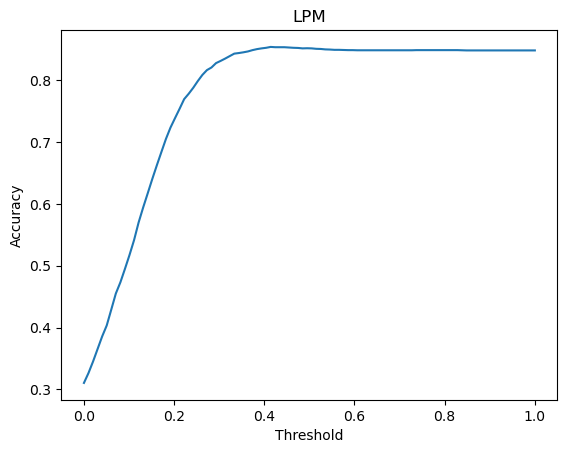

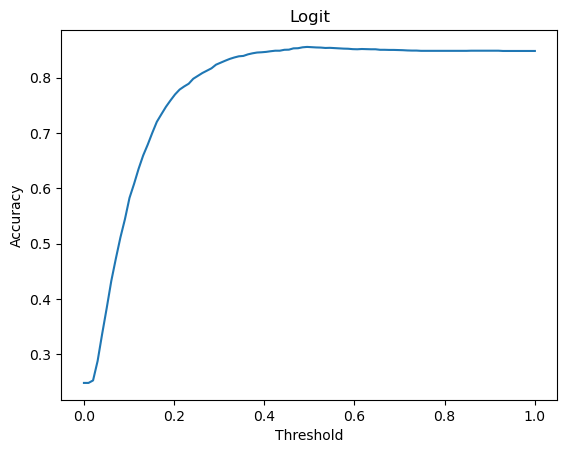

In [16]:
#%% Finding the optimal threshold

thresholds = np.linspace(0, 1, 100)
accuracies = np.empty(100)
for i in range(100):
    yhatlpm = predlpm > thresholds[i]
    accuracies[i] = np.mean(yhatlpm == fram_df.TenYearCHD)
_ = plt.plot(thresholds, accuracies)
_ = plt.title("LPM")
_ = plt.xlabel("Threshold")
_ = plt.ylabel("Accuracy")
_ = plt.show()

thresholds = np.linspace(0, 1, 100)
accuracies = np.empty(100)
for i in range(100):
    yhatlogit = predlogit > thresholds[i]
    accuracies[i] = np.mean(yhatlogit == fram_df.TenYearCHD)
_ = plt.plot(thresholds, accuracies)
_ = plt.title("Logit")
_ = plt.xlabel("Threshold")
_ = plt.ylabel("Accuracy")
_ = plt.show()
